In [1]:
using CSV, DataFrames, StatsPlots, Statistics

In [2]:
Plots.default(legend=false, size=(600, 300), alpha=0.5)
ENV["COLUMNS"] = 200
ENV["LINES"] = 10

10

In [3]:
download("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", "auto.txt")

"auto.txt"

In [4]:
readline("auto.txt")

"18.0   8.   307.0      130.0      3504.      12.0   70.  1.\t\"chevrolet chevelle malibu\""

In [5]:
# replace the one tab sep by spaces
run(pipeline(`sed 's/\t/    /g' auto.txt`, stdout="auto-no-tab.txt"))

Process(`sed 's/\t/    /g' auto.txt`, ProcessExited(0))

In [6]:
df = CSV.read(
    "auto-no-tab.txt",
    delim=' ',
    ignorerepeated=true,
    header=[:mpg, :cylinders, :displacement, :horesepower, :weight, :acceleration, :year, :origin, :name],
    missingstring="NA"
)

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name
,Float64?,Float64,Float64,Float64?,Float64,Float64,Float64,Float64,String
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
6,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
7,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
8,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
9,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina


In [7]:
df[: , "name"]  # This crates a copy!

406-element WeakRefStrings.StringArray{String,1}:
 "chevrolet chevelle malibu"
 "buick skylark 320"
 "plymouth satellite"
 ⋮
 "ford ranger"
 "chevy s-10"

In [8]:
df.name

406-element CSV.Column{String,String}:
 "chevrolet chevelle malibu"
 "buick skylark 320"
 "plymouth satellite"
 ⋮
 "ford ranger"
 "chevy s-10"

In [21]:
missing_summary = mapcols(x-> count(ismissing, x), df)  # -> is a lambda function
missing_summary

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name,brand
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,0,0,0,0,0,0,0,0,0


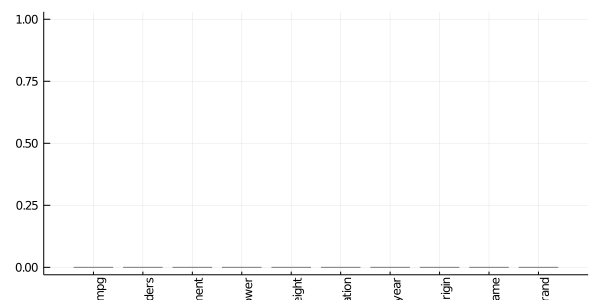

In [22]:
bar(names(missing_summary), Array(missing_summary[1, :]), xrotation=90)

In [11]:
filter(x -> any(ismissing, x), df)

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name
,Float64?,Float64,Float64,Float64?,Float64,Float64,Float64,Float64,String
1,missing,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
2,missing,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
3,missing,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
4,missing,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
5,missing,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
6,missing,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
7,25.0,4.0,98.0,missing,2046.0,19.0,71.0,1.0,ford pinto
8,missing,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
9,21.0,6.0,200.0,missing,2875.0,17.0,74.0,1.0,ford maverick


In [12]:
df.brand = first.(split.(df.name))  # split on space and get first element of returned vector

406-element Array{SubString{String},1}:
 "chevrolet"
 "buick"
 "plymouth"
 ⋮
 "ford"
 "chevy"

In [13]:
first(df, 5)

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name,brand
,Float64?,Float64,Float64,Float64?,Float64,Float64,Float64,Float64,String,SubStri…
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford


In [14]:
df = dropmissing(df)

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name,brand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,SubStri…
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
6,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500,ford
7,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala,chevrolet
8,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii,plymouth
9,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina,pontiac


In [15]:
filter(:brand => ==("saab"), df)   # pass a column to a filter function; fast

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name,brand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,SubStri…
1,25.0,4.0,104.0,95.0,2375.0,17.5,70.0,2.0,saab 99e,saab
2,24.0,4.0,121.0,110.0,2660.0,14.0,73.0,2.0,saab 99le,saab
3,25.0,4.0,121.0,115.0,2671.0,13.5,75.0,2.0,saab 99le,saab
4,21.6,4.0,121.0,115.0,2795.0,15.7,78.0,2.0,saab 99gle,saab


In [16]:
filter(x -> x.brand == "saab", df)     # rowwise; slower

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name,brand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,SubStri…
1,25.0,4.0,104.0,95.0,2375.0,17.5,70.0,2.0,saab 99e,saab
2,24.0,4.0,121.0,110.0,2660.0,14.0,73.0,2.0,saab 99le,saab
3,25.0,4.0,121.0,115.0,2671.0,13.5,75.0,2.0,saab 99le,saab
4,21.6,4.0,121.0,115.0,2795.0,15.7,78.0,2.0,saab 99gle,saab


In [17]:
CSV.write("auto2.csv", df)

"auto2.csv"